<a href="https://colab.research.google.com/github/lblogan14/bayes_methods_for_hackers/blob/main/ch1_ph_bayesian_infer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Chapter 1. The Philosophy of Bayesian Inference

##Bayesian Framework

If the code passes $X$ tests, the new belief (*posterior probability*) is updated using the Bayes' theorem,
\begin{equation}
P(A|X) = \frac{P(X|A)P(A)}{P(X)} \propto P(X|A)P(A)
\end{equation}

Example: Libraian or Farmer?

Assume that the ratio of male farmers to male librarians is 20:1, and there are only two professions here. Let $A$ denote the event that Steve is a librarian. Then $P(A) = 1/21 = 0.047$. Assume the probability of the neighbor's description given Steve is a librarian is $P(X|A)=0.95$.

The chance of anyone being described in the way the neighbor described Steve is $P(X)$ is given by
\begin{equation}
P(X)=P(X\text{ and }A)+P(X\text{ and }\sim A)= P(X|A)P(A)+P(X|\sim A)P(\sim A)
\end{equation}
where $\sim A$ means that Steve is not a librarian. So $P(\sim A)=1-P(A)=20/21$. Assume that the probability of a neighbor describing Steve as $X$, given he is a farmer is $P(X|\sim A)=0.5$. Thus, $P(X)=0.95*(1/21)+0.5*(20/21)=0.52$.

Hence,
\begin{equation}
P(A|X)=\frac{0.95*(1/21)}{0.52}=0.087
\end{equation} 

In [2]:
%matplotlib inline
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
prior = [1/21., 20/21.]
posterior = [0.087, 1-0.087]

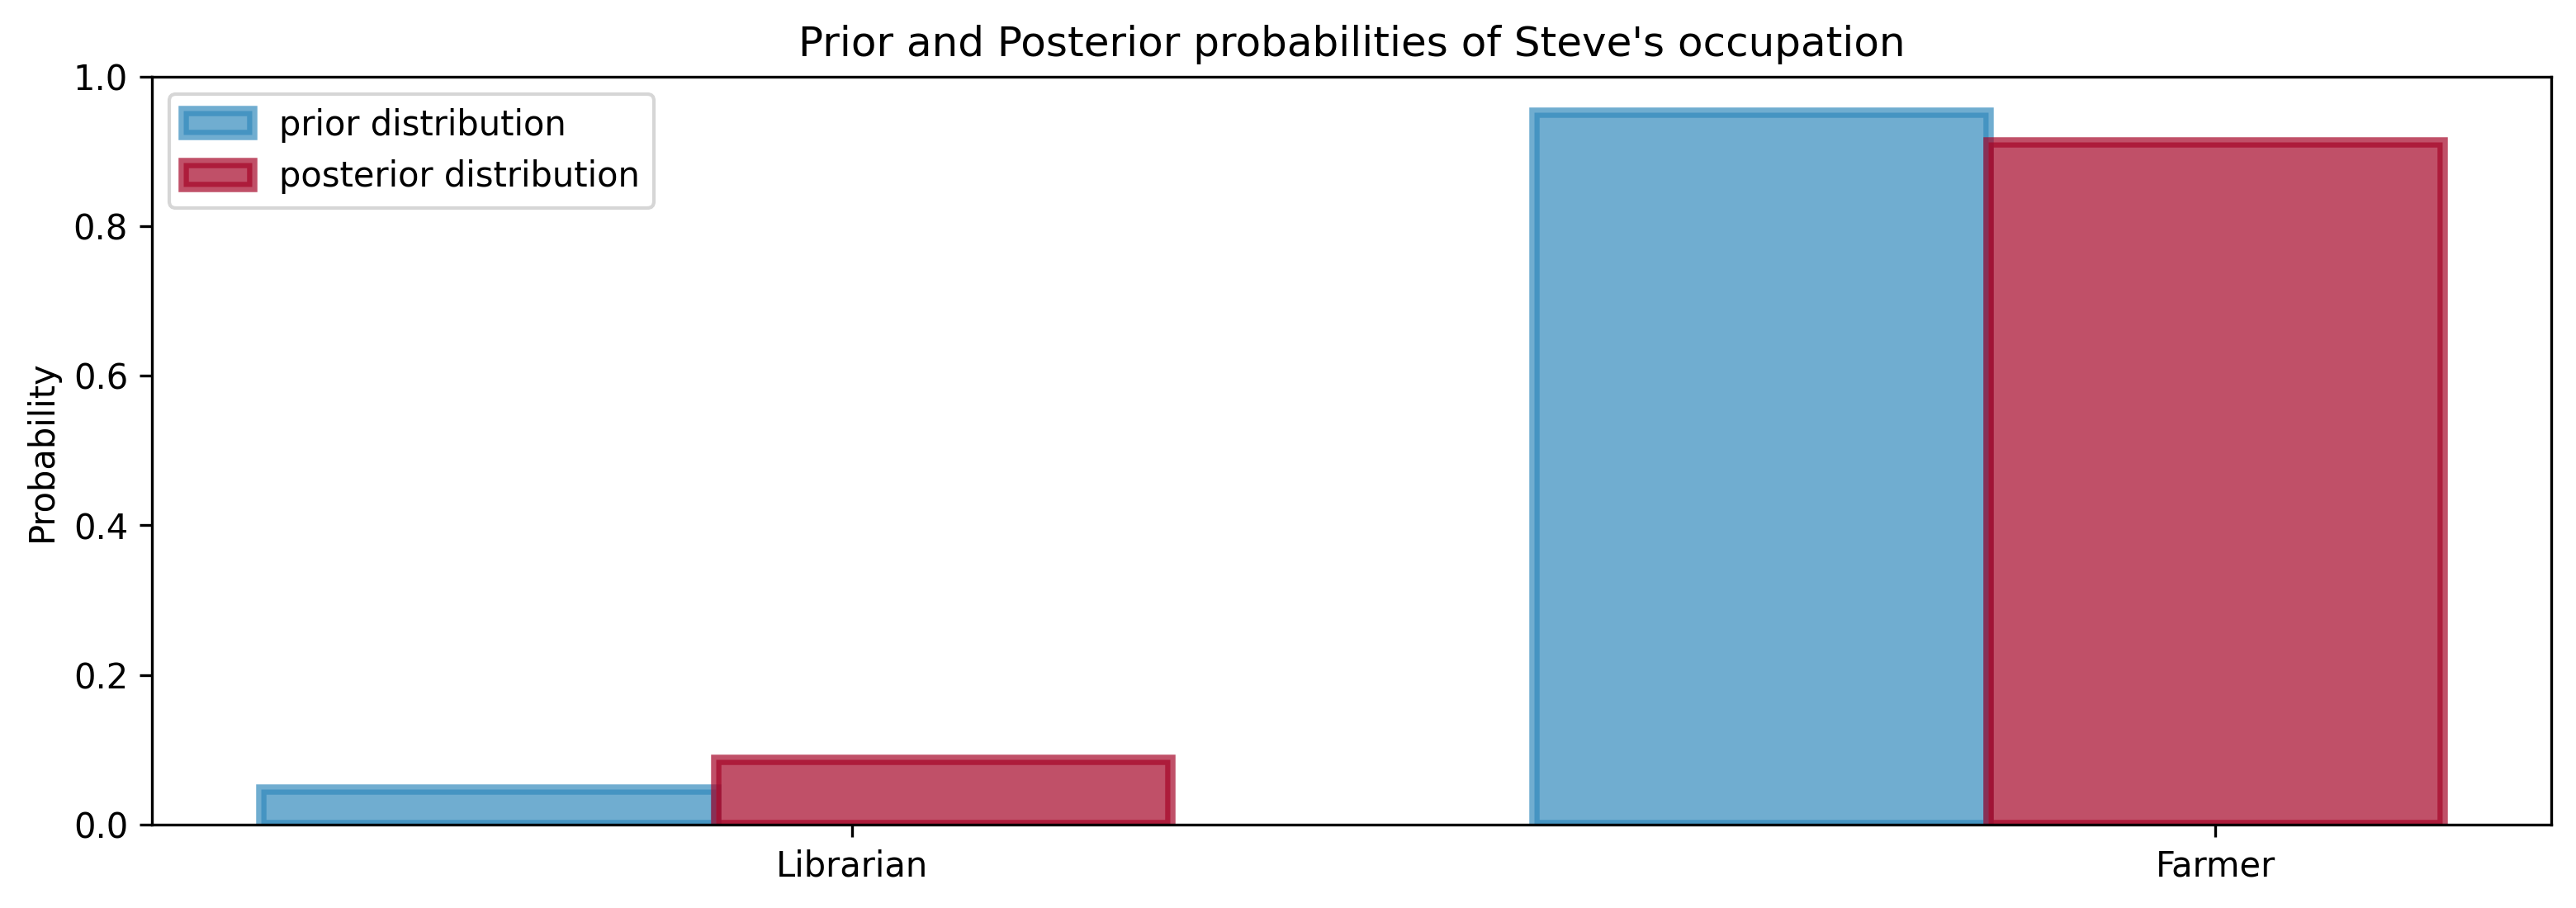

In [ ]:
figsize(12.5, 4)
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 300

colors = ['#348ABD', '#A60628']
plt.bar([0, .7], prior, alpha=0.7, width=0.25,
        color=colors[0], label='prior distribution',
        lw='3', edgecolor=colors[0])
plt.bar([0+.25, .7+.25], posterior, alpha=0.7, width=0.25,
        color=colors[1], label='posterior distribution',
        lw='3', edgecolor=colors[1])
plt.xticks([0.2, 0.95], ['Librarian', 'Farmer'])
plt.title('Prior and Posterior probabilities of Steve\'s occupation')
plt.ylabel('Probability')
plt.legend(loc='upper left')
plt.show()

##Probability Distributions

Let $Z$ be some random variable. Associated with $Z$ is a *probability distribution function* that assigns probabilities to the different outcomes $Z$ can take.

$Z$ can be **discrete**, **continuous**, or **mixed**.

###Discrete Case

If $Z$ is discrete, then its distribution is called a *probability mass function*, which measures the probability that $Z$ takes on the value $k$, denoted $P(Z=k)$.

$Z$ is *Poisson*-distributed if
$$P(Z=k)=\frac{\lambda^k e^{-\lambda}}{k!},\, k=0,1,2,...$$
$\lambda$ is a parameter of the distribution, and controls the distribution's shape. $\lambda$ can be any positive number. More probability is added to larger values if $\lambda$ is increased.

$k$ must be a non-negative integer.

The expected value of the Poisson distribution is equal to its parameter,
$$E[Z[\lambda]]=\lambda$$

In [ ]:
figsize(12.5, 4)

import scipy.stats as stats
a = np.arange(16)
poi = stats.poisson
lambda_ = [1.5, 4.25]
colors = ['#348ABD', '#A60628']

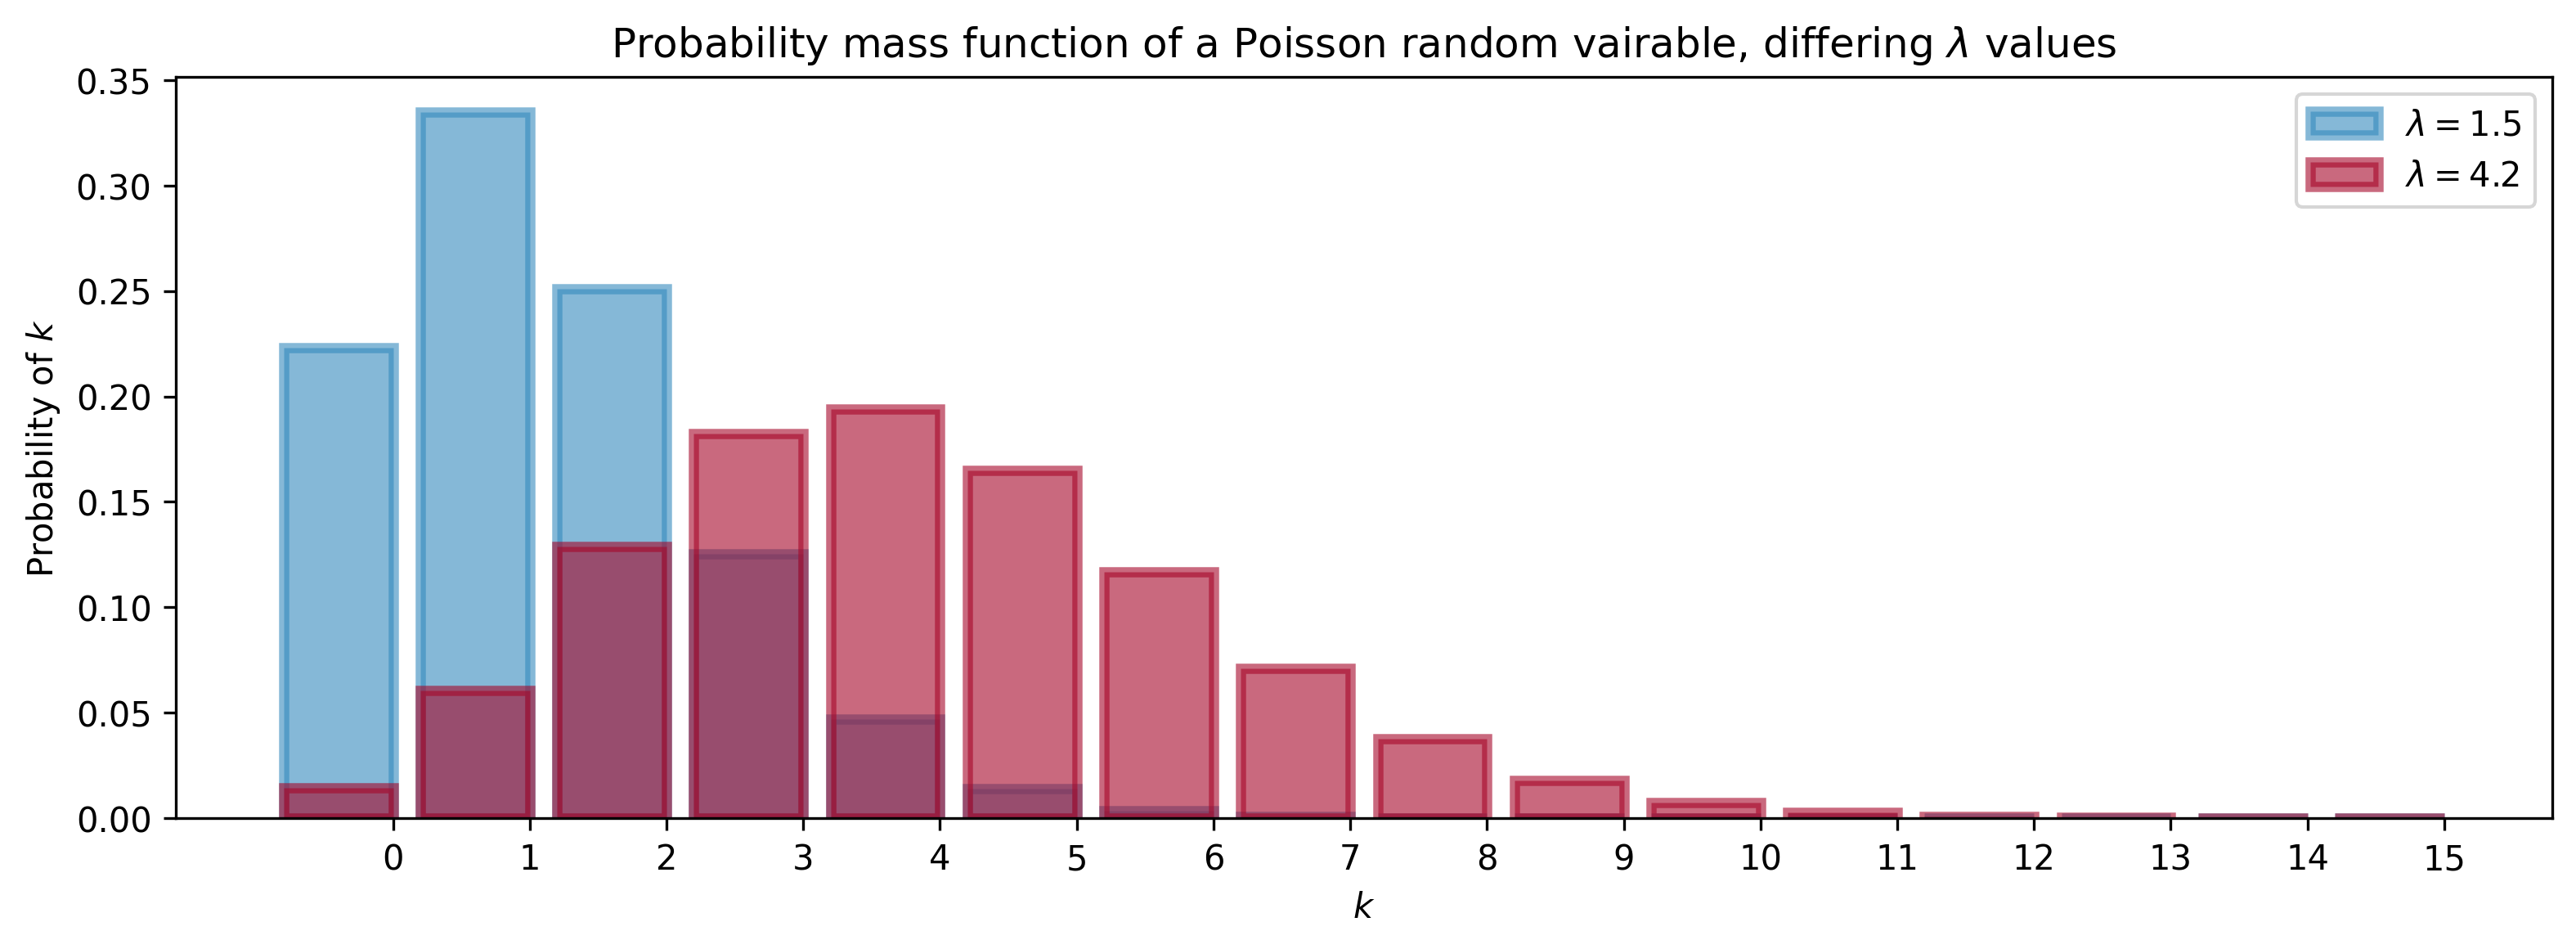

In [ ]:
plt.bar(a, poi.pmf(a, lambda_[0]), color=colors[0],
        label='$\lambda = {:.1f}$'.format(lambda_[0]), alpha=0.6,
        edgecolor=colors[0], lw='3')
plt.bar(a, poi.pmf(a, lambda_[1]), color=colors[1],
        label='$\lambda = {:.1f}$'.format(lambda_[1]), alpha=0.6,
        edgecolor=colors[1], lw='3')
plt.xticks(a+0.4, a)
plt.legend()
plt.ylabel('Probability of $k$')
plt.xlabel('$k$')
plt.title('Probability mass function of a Poisson random vairable, differing $\lambda$ values')
plt.show()

###Continuous Case


A continuous random variable has a *probability density function*. Consider a density function for an exponential random variable,
$$f_Z(z|\lambda)=\lambda e^{-\lambda z},\, z\geq 0$$
Given a specific $\lambda$, the expected value of an exponential random variable is equal to the inverse of $\lambda$,
$$E[Z|\lambda]=\frac{1}{\lambda}$$

In [ ]:
a = np.linspace(0, 4, 100)
expo = stats.expon
lambda_ = [0.5, 1]

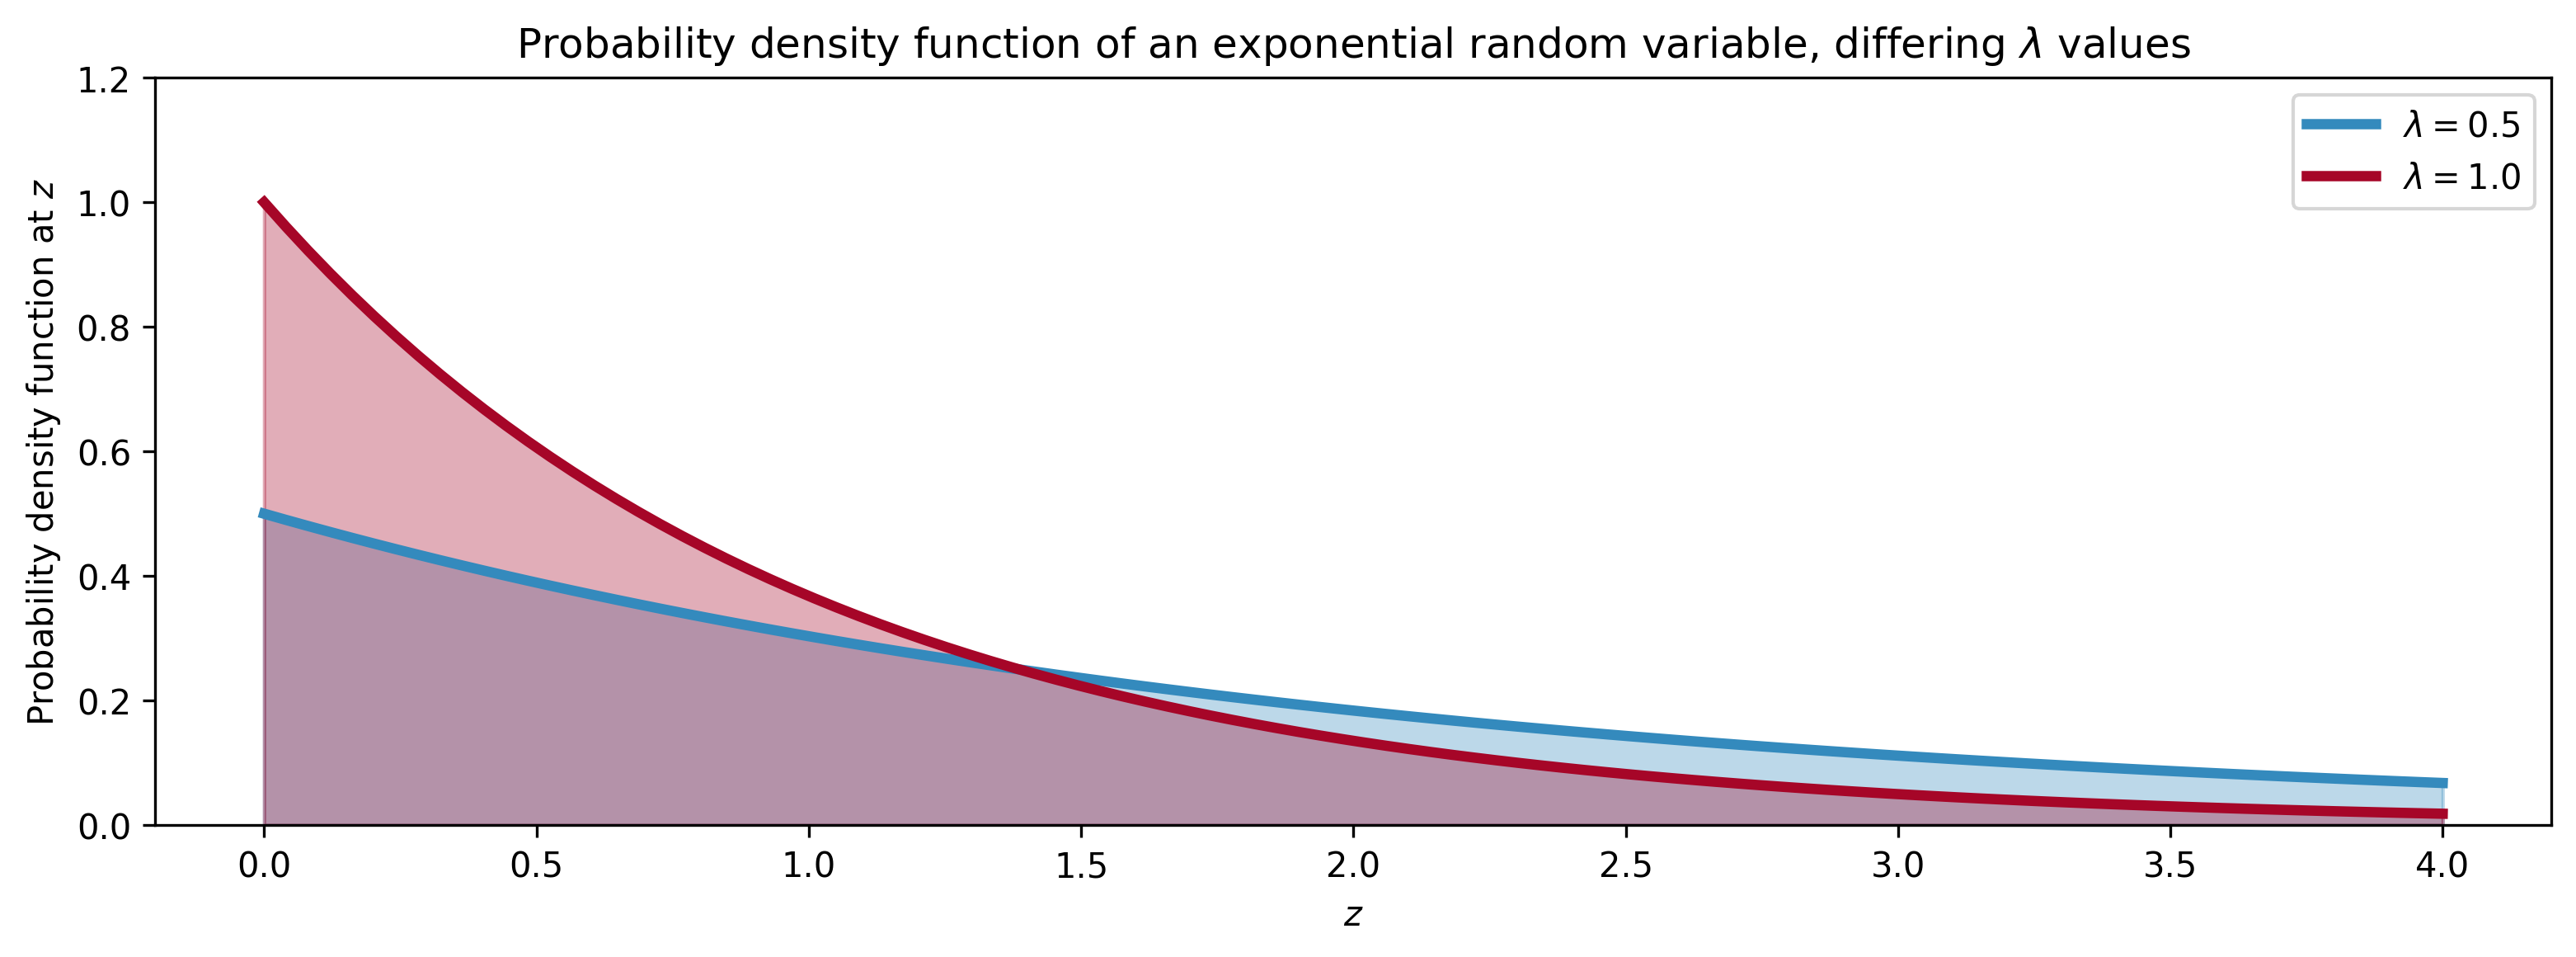

In [ ]:
for l,c in zip(lambda_, colors):
    plt.plot(a, expo.pdf(a, scale=1./l), lw=3,
             color=c, label='$\lambda = {:.1f}$'.format(l))
    plt.fill_between(a, expo.pdf(a, scale=1./l), color=c, alpha=0.33)
plt.legend()
plt.ylabel('Probability density function at $z$')
plt.xlabel('$z$')
plt.ylim(0, 1.2)
plt.title('Probability density function of an exponential random variable, differing $\lambda$ values')
plt.show()

In the real world case, $\lambda$ is hidden from us. We only see $Z$.

Bayesian inference is concerned with *belifs* about what $\lambda$ might be.

##Perform Bayesian Inference using Different Probalistic Programmings

In [8]:
# This is the txtdata.csv file from the original book
count_data = np.array([1.300000000000000000e+01,
2.400000000000000000e+01,
8.000000000000000000e+00,
2.400000000000000000e+01,
7.000000000000000000e+00,
3.500000000000000000e+01,
1.400000000000000000e+01,
1.100000000000000000e+01,
1.500000000000000000e+01,
1.100000000000000000e+01,
2.200000000000000000e+01,
2.200000000000000000e+01,
1.100000000000000000e+01,
5.700000000000000000e+01,
1.100000000000000000e+01,
1.900000000000000000e+01,
2.900000000000000000e+01,
6.000000000000000000e+00,
1.900000000000000000e+01,
1.200000000000000000e+01,
2.200000000000000000e+01,
1.200000000000000000e+01,
1.800000000000000000e+01,
7.200000000000000000e+01,
3.200000000000000000e+01,
9.000000000000000000e+00,
7.000000000000000000e+00,
1.300000000000000000e+01,
1.900000000000000000e+01,
2.300000000000000000e+01,
2.700000000000000000e+01,
2.000000000000000000e+01,
6.000000000000000000e+00,
1.700000000000000000e+01,
1.300000000000000000e+01,
1.000000000000000000e+01,
1.400000000000000000e+01,
6.000000000000000000e+00,
1.600000000000000000e+01,
1.500000000000000000e+01,
7.000000000000000000e+00,
2.000000000000000000e+00,
1.500000000000000000e+01,
1.500000000000000000e+01,
1.900000000000000000e+01,
7.000000000000000000e+01,
4.900000000000000000e+01,
7.000000000000000000e+00,
5.300000000000000000e+01,
2.200000000000000000e+01,
2.100000000000000000e+01,
3.100000000000000000e+01,
1.900000000000000000e+01,
1.100000000000000000e+01,
1.800000000000000000e+01,
2.000000000000000000e+01,
1.200000000000000000e+01,
3.500000000000000000e+01,
1.700000000000000000e+01,
2.300000000000000000e+01,
1.700000000000000000e+01,
4.000000000000000000e+00,
2.000000000000000000e+00,
3.100000000000000000e+01,
3.000000000000000000e+01,
1.300000000000000000e+01,
2.700000000000000000e+01,
0.000000000000000000e+00,
3.900000000000000000e+01,
3.700000000000000000e+01,
5.000000000000000000e+00,
1.400000000000000000e+01,
1.300000000000000000e+01,
2.200000000000000000e+01])

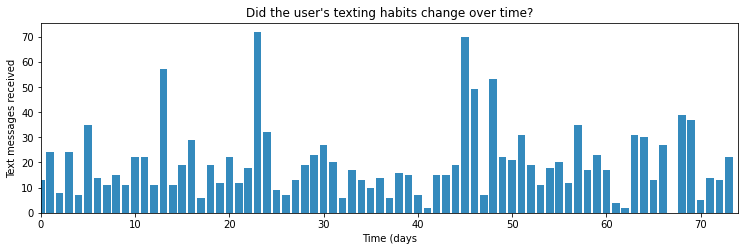

In [4]:
figsize(12.5, 3.5)
n_count_data = len(count_data)
plt.bar(np.arange(n_count_data), count_data, color='#348ABD')
plt.xlabel('Time (days')
plt.ylabel('Text messages received')
plt.title('Did the user\'s texting habits change over time?')
plt.xlim(0, n_count_data)
plt.show()

###PyMC
PyMC is a Phyton library for programming Baeysian analysis.

In [6]:
!pip install pymc

     |████████████████████████████████| 389kB 2.9MB/s 
  Created wheel for pymc: filename=pymc-2.3.8-cp36-cp36m-linux_x86_64.whl size=1275934 sha256=895cb13874f88ec49cecba4655a1f0ca5cabec6f5b235da01020d35e81270d1c
  Stored in directory: /root/.cache/pip/wheels/0b/a8/e7/8f3ba91a39294d538a92db052fd1fcba1fca74a58c8b022026
Successfully built pymc


In [9]:
import pymc as pm

alpha = 1.0 / count_data.mean()
# Recall that count_data is the variable that holds text counts

lambda_1 = pm.Exponential('lambda_1', alpha)
lambda_2 = pm.Exponential('lambda_2', alpha)
tau = pm.DiscreteUniform('tau', lower=0, upper=n_count_data)

The model is represented by $(\tau, \lambda_1, \lambda_2)$

In the code above, create the PyMC variables corresponding to $\lambda_1$ and $\lambda_2$ and assign them to PyMC's *stochastic variables*. These can used in the `random()` methods and are treated as random number generators:

In [11]:
print('Random output: ', tau.random(), tau.random(), tau.random())

Random output:  65 49 1


In [12]:
print('Random output: ', lambda_1.random(), lambda_1.random(), lambda_1.random())

Random output:  20.897461459032982 54.17982942152017 2.178104178332844


In [13]:
@pm.deterministic
def lambda_(tau=tau, lambda_1=lambda_1, lambda_2=lambda_2):
    out = np.zeros(n_count_data) # number of data points
    out[:tau] = lambda_1 # lambda before tau is lambda_1
    out[tau:] = lambda_2 # lambda after (and including) tau is lambda_2
    
    return out

This creates a new function `lambda_` as a random variable

`@pm.deterministic` is a decorator that tells PyMC this is a d*eterministic function*. That is, if the arguments were deterministic (which they are not), the output would be deterministic as well.

In [14]:
observation = pm.Poisson('obs', lambda_, value=count_data, observed=True)

model = pm.Model([observation, lambda_1, lambda_2, tau])

The variable `observation` combines the data `count_data` with the proposed data-generation scheme, given by the variable `lambda_`, through the `value` keyword. `observed=True` tells PyMC that this should stay fixed in the analysis. Finally, PyMC collects all the variables of interest and creates a `Model` instance out of them.

The following code is the *learning phase*. The algorithm deployed is called *Markov Chain Monte Carlo (MCMC)*. This techinque returns thousands of random variables from the posterior distributions of $\lambda_1, \lambda_2, \tau$.

In [15]:
mcmc = pm.MCMC(model)
mcmc.sample(40000, 10000) # 30,000 (40,000 minus 10,000) samples back

/usr/local/lib/python3.6/dist-packages/pymc/MCMC.py:81: UserWarning: Instantiating a Model object directly is deprecated. We recommend passing variables directly to the Model subclass.
  warnings.warn(message)


 [-----------------100%-----------------] 40000 of 40000 complete in 5.5 sec

In [16]:
lambda_1_smaples = mcmc.trace('lambda_1')[:]
lambda_2_samples = mcmc.trace('lambda_2')[:]
tau_samples = mcmc.trace('tau')[:]

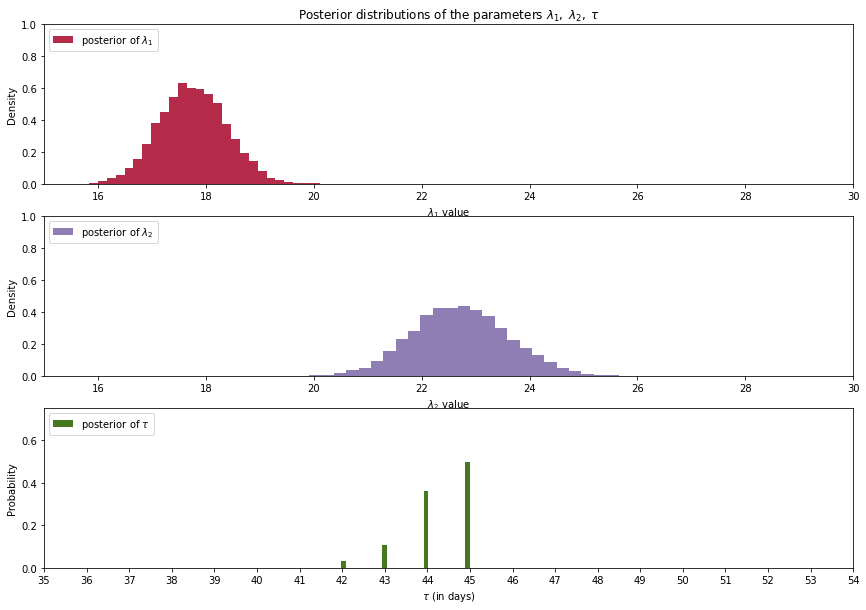

In [23]:
figsize(14.5, 10)

ax = plt.subplot(311)
ax.set_autoscaley_on(False)
plt.hist(lambda_1_smaples, histtype='stepfilled', bins=30, alpha=0.85,
         label='posterior of $\lambda_1$', color='#A60628', density=True)
plt.legend(loc='upper left')
plt.title(r'''Posterior distributions of the parameters $\lambda_1,\;\lambda_2,\;\tau$''')
plt.xlim([15, 30])
plt.xlabel('$\lambda_1$ value')
plt.ylabel('Density')

ax = plt.subplot(312)
ax.set_autoscaley_on(False)
plt.hist(lambda_2_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label='posterior of $\lambda_2$', color='#7A68A6', density=True)
plt.legend(loc='upper left')
plt.xlim([15, 30])
plt.xlabel('$\lambda_2$ value')
plt.ylabel('Density')

ax = plt.subplot(313)
w = 1.0 / tau_samples.shape[0] * np.ones_like(tau_samples)
plt.hist(tau_samples, bins=n_count_data, alpha=1,
         label=r'posterior of $\tau$', color='#467821', weights=w, rwidth=2.)
plt.xticks(np.arange(n_count_data))
plt.legend(loc='upper left')
plt.ylim([0, 0.75])
plt.xlim([35, len(count_data)-20])
plt.xlabel(r'$\tau$ (in days)')
plt.ylabel('Probability')
plt.show()

Bayesian methodlogy returns a distribution. The wider the distribuion, the less certain the posterior belief should be.

In the following code, let $i$ index samples from the posterior distributions. Given a day $t$, average over all possible $\lambda_i$ for that day $t$, using $\lambda_i=\lambda_{1,i}$ if $t<\tau_i$ (that is, if the behavior change has not yet occurred), else $\lambda_i=\lambda_{2,i}$:

In [24]:
# tau_samples, lambda_1_samples, lambda_2_samples contains
# N samples from the corresponding posterior distribution
N = tau_samples.shape[0]
expected_texts_per_day = np.zeros(n_count_data) # number of data points

In [25]:
for day in range(0, n_count_data):
    # ix is a bool index of all tau samples corresponding to
    # the switchpoint occurring prior to value of "day".
    ix = day < tau_samples
    # Each posterior sample corresponds to a value for tau.
    # For each day, that value of tau indicates whether we are
    # "before"
    # (in the lambda_1 "regime") or
    # "after" (in the lambda_2 "regime") the switchpoint.
    # By taking the posterior sample of lambda_1/2 accordingly,
    # we can average
    # over all samples to get an expected value for lambda on that day.
    # As explained, the "message count" random variable is
    # Poisson-distributed,
    # and therefore lambda (the Poisson parameter) is the expected
    # value of "message count".

    expected_texts_per_day[day] = (lambda_1_smaples[ix].sum() + lambda_2_samples[~ix].sum()) / N

[17.76099731 17.76099731 17.76099731 17.76099731 17.76099731 17.76099731
 17.76099731 17.76099731 17.76099731 17.76099731 17.76099731 17.76099731
 17.76099731 17.76099731 17.76099731 17.76099731 17.76099731 17.76099731
 17.76099731 17.76099731 17.76099731 17.76099731 17.76099731 17.76099731
 17.76099731 17.76099731 17.76099731 17.76099731 17.76099731 17.76099731
 17.76099731 17.76099731 17.76099731 17.76099731 17.76099731 17.76099731
 17.76099731 17.76104794 17.76129951 17.76191119 17.76246705 17.76622796
 17.91385779 18.41601756 20.21038162 22.71999769 22.71999769 22.71999769
 22.71999769 22.71999769 22.71999769 22.71999769 22.71999769 22.71999769
 22.71999769 22.71999769 22.71999769 22.71999769 22.71999769 22.71999769
 22.71999769 22.71999769 22.71999769 22.71999769 22.71999769 22.71999769
 22.71999769 22.71999769 22.71999769 22.71999769 22.71999769 22.71999769
 22.71999769 22.71999769]


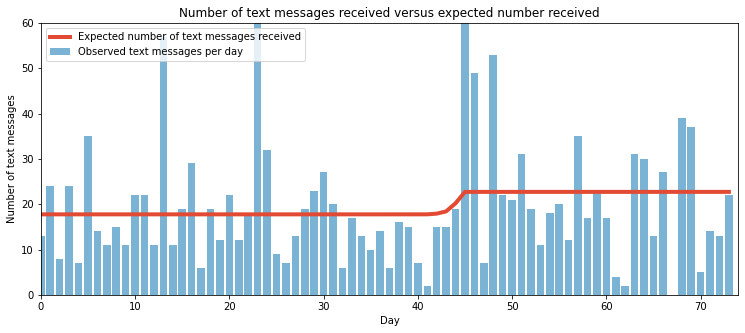

In [26]:
figsize(12.5, 5)
plt.plot(range(n_count_data), expected_texts_per_day, lw=4,
         color='#E24A33', label='Expected number of text messages received')
plt.xlim(0, n_count_data)
plt.xlabel('Day')
plt.ylabel('Number of text messages')
plt.title('Number of text messages received versus expected number received')
plt.ylim(0, 60)
plt.bar(np.arange(len(count_data)), count_data, color='#348ABD',
        alpha=0.65, label='Observed text messages per day')
plt.legend(loc='upper left')
print(expected_texts_per_day)

###PyMC3

In [27]:
!pip install pymc3

In [28]:
import pymc3 as pm
import theano.tensor as tt

In [29]:
with pm.Model() as model:
    alpha = 1.0 / count_data.mean()

    lambda_1 = pm.Exponential('lambda_1', alpha)
    lambda_2 = pm.Exponential('lambda_2', alpha)

    tau = pm.DiscreteUniform('tau', lower=0, upper=n_count_data-1)

In the code above, create the PyMC3 variables

In [30]:
with model:
    idx = np.arange(n_count_data) # index
    lambda_ = pm.math.switch(tau > idx, lambda_1, lambda_2)

This code creates a new function `lambda_` and treated as a random variable, the random variable $\lambda$ from above. The `switch()` function assigns `lambda_1` and `lambda_2` as the value of `lambda_`, depending on what side of `tau` is on.

Note that becuase `lambda_1, lambda_2, tau` are random, `lambda_` will be random too.

In [31]:
with model:
    observation = pm.Poisson('obs', lambda_, observed=count_data)

The variable `observation` combines the data `count_data` with the proposed data-generation scheme, given by the variable `lambda_`, through the `observed` keyword.

For the MCMC process,

In [32]:
with model:
    step = pm.Metropolis()
    trace = pm.sample(10000, tune=5000, step=step)

Sequential sampling (2 chains in 1 job)
CompoundStep
>Metropolis: [tau]
>Metropolis: [lambda_2]
>Metropolis: [lambda_1]
100%|██████████| 15000/15000 [00:06<00:00, 2451.59it/s]
The number of effective samples is smaller than 25% for some parameters.


In [33]:
lambda_1_samples = trace['lambda_1']
lambda_2_samples = trace['lambda_2']
tau_samples = trace['tau']

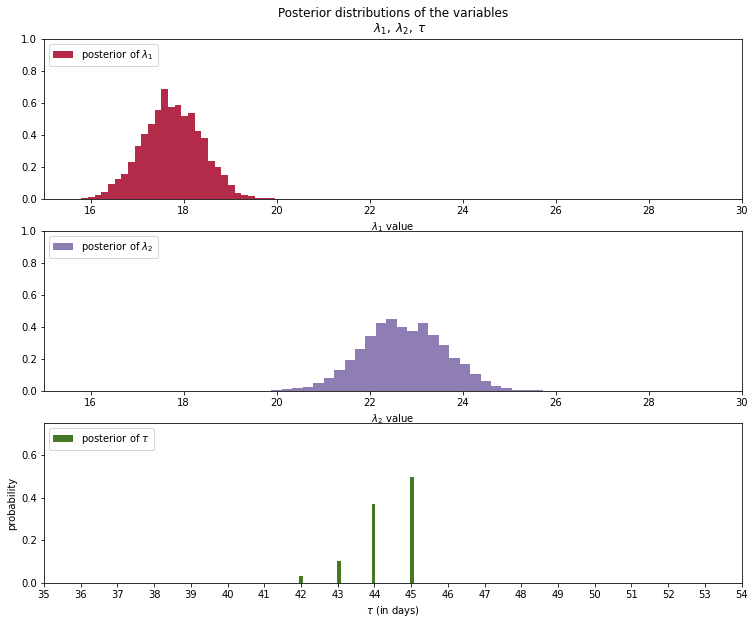

In [36]:
figsize(12.5, 10)

ax = plt.subplot(311)
ax.set_autoscaley_on(False)
plt.hist(lambda_1_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="posterior of $\lambda_1$", color="#A60628", density=True)
plt.legend(loc="upper left")
plt.title(r"""Posterior distributions of the variables
    $\lambda_1,\;\lambda_2,\;\tau$""")
plt.xlim([15, 30])
plt.xlabel("$\lambda_1$ value")

ax = plt.subplot(312)
ax.set_autoscaley_on(False)
plt.hist(lambda_2_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="posterior of $\lambda_2$", color="#7A68A6", density=True)
plt.legend(loc="upper left")
plt.xlim([15, 30])
plt.xlabel("$\lambda_2$ value")

plt.subplot(313)
w = 1.0 / tau_samples.shape[0] * np.ones_like(tau_samples)
plt.hist(tau_samples, bins=n_count_data, alpha=1,
         label=r"posterior of $\tau$",
         color="#467821", weights=w, rwidth=2.)
plt.xticks(np.arange(n_count_data))

plt.legend(loc="upper left")
plt.ylim([0, .75])
plt.xlim([35, len(count_data)-20])
plt.xlabel(r"$\tau$ (in days)")
plt.ylabel("probability")
plt.show()

In [35]:
N = tau_samples.shape[0]
expected_texts_per_day = np.zeros(n_count_data)

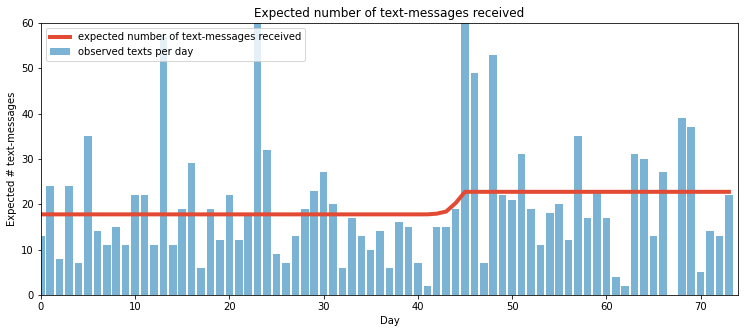

In [37]:
figsize(12.5, 5)
for day in range(0, n_count_data):
    ix = day < tau_samples
    expected_texts_per_day[day] = (lambda_1_samples[ix].sum()
                                   + lambda_2_samples[~ix].sum()) / N

plt.plot(range(n_count_data), expected_texts_per_day, lw=4, color="#E24A33",
         label="expected number of text-messages received")
plt.xlim(0, n_count_data)
plt.xlabel("Day")
plt.ylabel("Expected # text-messages")
plt.title("Expected number of text-messages received")
plt.ylim(0, 60)
plt.bar(np.arange(len(count_data)), count_data, color="#348ABD", alpha=0.65,
        label="observed texts per day")

plt.legend(loc="upper left")
plt.show()

###Pyro
Pyro is a Python library for programming Bayesian analysis and built on PyTorch.

In [41]:
!pip3 install pyro-ppl

     |████████████████████████████████| 614kB 2.8MB/s 


In [42]:
import torch
import pyro
import pyro.distributions as dist
from pyro.infer import MCMC, NUTS, HMC

In [45]:
def model(data):
    alpha = 1.0 / data.mean()
    lambda_1 = pyro.sample('lambda_1', dist.Exponential(alpha))
    lambda_2 = pyro.sample('lambda_2', dist.Exponential(alpha))

    tau = pyro.sample('tau', dist.Uniform(0,1))
    lambda1_size = (tau * data.size(0)+1).long()
    lambda2_size = data.size(0) - lambda1_size
    lambda_ = torch.cat([lambda_1.expand((lambda1_size,)),
                         lambda_2.expand((lambda2_size,))])
    
    with pyro.plate('data', data.size(0)):
        pyro.sample('obs', dist.Poisson(lambda_), obs=data)

In [49]:
count_data = torch.from_numpy(count_data)
kernel = NUTS(model, jit_compile=True, ignore_jit_warnings=True, max_tree_depth=3)
posterior = MCMC(kernel=kernel, num_samples=5000, warmup_steps=500)
posterior.run(count_data)

Sample: 100%|██████████| 5500/5500 [00:55, 98.78it/s, step size=3.53e-01, acc. prob=0.630]


In [50]:
hmc_samples = {k: v.detach().cpu().numpy() for k,v in posterior.get_samples().items()}
lambda_1_samples = hmc_samples['lambda_1']
lambda_2_samples = hmc_samples['lambda_2']
tau_samples = (hmc_samples['tau'] * count_data.size(0)+1).astype(int)

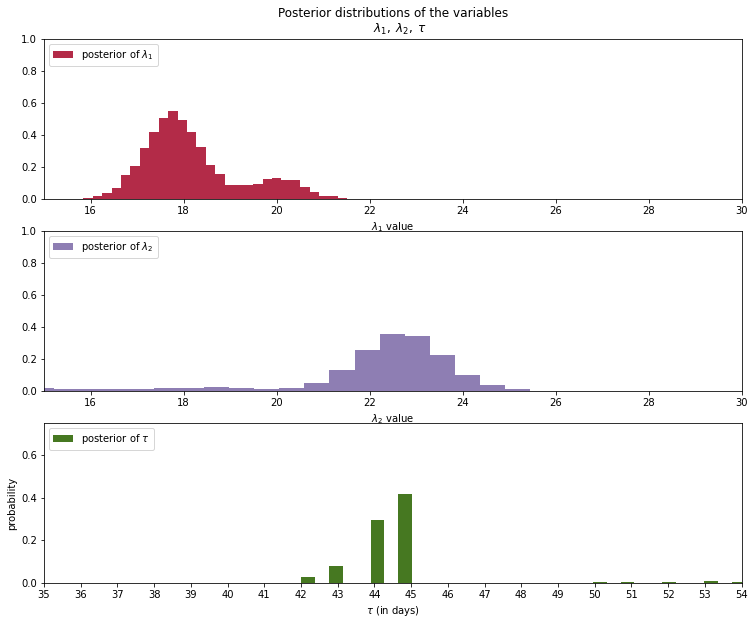

In [51]:
figsize(12.5, 10)

ax = plt.subplot(311)
ax.set_autoscaley_on(False)
plt.hist(lambda_1_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="posterior of $\lambda_1$", color="#A60628", density=True)
plt.legend(loc="upper left")
plt.title(r"""Posterior distributions of the variables
    $\lambda_1,\;\lambda_2,\;\tau$""")
plt.xlim([15, 30])
plt.xlabel("$\lambda_1$ value")

ax = plt.subplot(312)
ax.set_autoscaley_on(False)
plt.hist(lambda_2_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="posterior of $\lambda_2$", color="#7A68A6", density=True)
plt.legend(loc="upper left")
plt.xlim([15, 30])
plt.xlabel("$\lambda_2$ value")

plt.subplot(313)
w = 1.0 / tau_samples.shape[0] * np.ones_like(tau_samples)
plt.hist(tau_samples, bins=n_count_data, alpha=1,
         label=r"posterior of $\tau$",
         color="#467821", weights=w, rwidth=2.)
plt.xticks(np.arange(n_count_data))

plt.legend(loc="upper left")
plt.ylim([0, .75])
plt.xlim([35, len(count_data)-20])
plt.xlabel(r"$\tau$ (in days)")
plt.ylabel("probability")
plt.show()

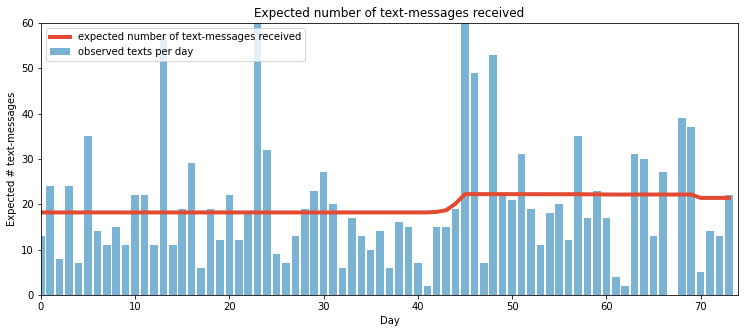

In [52]:
figsize(12.5, 5)

N = tau_samples.shape[0]
expected_texts_per_day = np.zeros(n_count_data)
for day in range(0, n_count_data):
    ix = day < tau_samples
    expected_texts_per_day[day] = (lambda_1_samples[ix].sum()
                                   + lambda_2_samples[~ix].sum()) / N


plt.plot(range(n_count_data), expected_texts_per_day, lw=4, color="#E24A33",
         label="expected number of text-messages received")
plt.xlim(0, n_count_data)
plt.xlabel("Day")
plt.ylabel("Expected # text-messages")
plt.title("Expected number of text-messages received")
plt.ylim(0, 60)
plt.bar(np.arange(len(count_data)), count_data, color="#348ABD", alpha=0.65,
        label="observed texts per day")

plt.legend(loc="upper left")
plt.show()

###Tensorflow Probability (TFP)
Tensorflow Probability (TFP) is a Python library for programming Bayesian analysis, built on Tensorflow.

In [53]:
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions
tfb = tfp.bijectors

In [54]:
# Defining data and assumptions
# same as before
count_data = tf.constant([
    13,  24,   8,  24,   7,  35,  14,  11,  15,  11,  22,  22,  11,  57,  
    11,  19,  29,   6,  19,  12,  22,  12,  18,  72,  32,   9,   7,  13,  
    19,  23,  27,  20,   6,  17,  13,  10,  14,   6,  16,  15,   7,   2,  
    15,  15,  19,  70,  49,   7,  53,  22,  21,  31,  19,  11,  18,  20,  
    12,  35,  17,  23,  17,   4,   2,  31,  30,  13,  27,   0,  39,  37,   
    5,  14,  13,  22,
], dtype=tf.float32)
n_count_data = tf.shape(count_data)
days = tf.range(n_count_data[0], dtype=tf.int32)

####Specify the joint log-density
Assume the data is a consequence of the following generative model:
$$\lambda_1^{(0)}\sim\text{Exponential(rate=}\alpha)$$
$$\lambda_2^{(0)}\sim\text{Exponential(rate=}\alpha)$$
$$\tau\sim\text{Uniform(low=0, high=1)}$$
for i=1...N:
$$\lambda_i=\begin{cases}
\lambda_1^{(0)}, & \tau>i/N\\
\lambda_2^{(0)}, & \text{otherwise}
\end{cases}$$
$$X_i\sim \text{Poisson(rate=}\lambda_i)$$

In [55]:
def joint_log_prob(count_data, lambda_1, lambda_2, tau):
    alpha = (1. / tf.reduce_mean(count_data))
    rv_lambda_1 = tfd.Exponential(rate=alpha)
    rv_lambda_2 = tfd.Exponential(rate=alpha)

    rv_tau = tfd.Uniform()

    lambda_ = tf.gather(
        [lambda_1, lambda_2],
        indices=tf.cast(tau * tf.cast(tf.size(count_data), 
                                      dtype=tf.float32) <= tf.cast(tf.range(tf.size(count_data)), 
                                                                   dtype=tf.float32),
                        dtype=tf.int32))
    rv_observation = tfd.Poisson(rate=lambda_)

    return (
        rv_lambda_1.log_prob(lambda_1)
        + rv_lambda_2.log_prob(lambda_2)
        + rv_tau.log_prob(tau)
        + tf.reduce_sum(rv_observation.log_prob(count_data))
    )

TFP performs probalistic inference by evaluating the model parameters using a `joint_log_prob` function.

In [56]:
# Define a closure over the joint_log_prob
def unnormalized_log_posterior(lambda_1, lambda_2, tau):
    return joint_log_prob(count_data, lambda_1, lambda_2, tau)

####Specify the posterior sampler

In [57]:
# Wrap the MCMC sampling in a @tf.function to speed it up
@tf.function(autograph=False)
def graph_sample_chain(*args, **kwargs):
    return tfp.mcmc.sample_chain(*args, **kwargs)

In [58]:
num_burnin_steps = 5000
num_results = 20000

# Set the chain's start state
initial_chain_state = [
    tf.cast(tf.reduce_mean(count_data), tf.float32) * tf.ones([], dtype=tf.float32, name='init_lambda1'),
    tf.cast(tf.reduce_mean(count_data), tf.float32) * tf.ones([], dtype=tf.float32, name='init_lambda2'),
    0.5 * tf.ones([], dtype=tf.float32, name='init_tau'),
]

# Since HMC operates over unconstrained space, we need to transform the 
# samples so they live in real-space
unconstraining_bijectors = [
    tfp.bijectors.Exp(), # maps a positive real to R
    tfp.bijectors.Exp(), # maps a positive real to R
    tfp.bijectors.Sigmoid(), # maps [0,1] to R
]

step_size = 0.2

kernel = tfp.mcmc.TransformedTransitionKernel(
    inner_kernel=tfp.mcmc.HamiltonianMonteCarlo(
        target_log_prob_fn=unnormalized_log_posterior,
        num_leapfrog_steps=2,
        step_size=step_size,
        state_gradients_are_stopped=True),
    bijector=unconstraining_bijectors
)

kernel = tfp.mcmc.SimpleStepSizeAdaptation(
    inner_kernel=kernel,
    num_adaptation_steps=int(num_burnin_steps * 0.8)
)

In [59]:
# Sample from the chain
[
 lambda_1_samples, 
 lambda_2_samples,
 posterior_tau,
], kernel_results = graph_sample_chain(
    num_results=num_results,
    num_burnin_steps=num_burnin_steps,
    current_state=initial_chain_state,
    kernel=kernel
)

tau_samples = tf.floor(posterior_tau * tf.cast(tf.size(count_data), dtype=tf.float32))

/usr/local/lib/python3.6/dist-packages/tensorflow_probability/python/mcmc/sample.py:338: UserWarning: Tracing all kernel results by default is deprecated. Set the `trace_fn` argument to None (the future default value) or an explicit callback that traces the values you are interested in.
  warnings.warn('Tracing all kernel results by default is deprecated. Set '


In [60]:
print('acceptance rate: {}'.format(
    tf.reduce_mean(tf.cast(kernel_results.inner_results.inner_results.is_accepted, dtype=tf.float32))
))
print('final step size: {}'.format(
    tf.reduce_mean(kernel_results.inner_results.inner_results.accepted_results.step_size[-100:])
))

acceptance rate: 0.5271499752998352
final step size: 0.034027233719825745


In [62]:
class _TFColor(object):
    """Enum of colors used in TF docs."""
    red = '#F15854'
    blue = '#5DA5DA'
    orange = '#FAA43A'
    green = '#60BD68'
    pink = '#F17CB0'
    brown = '#B2912F'
    purple = '#B276B2'
    yellow = '#DECF3F'
    gray = '#4D4D4D'
    def __getitem__(self, i):
        return [
            self.red,
            self.orange,
            self.green,
            self.blue,
            self.pink,
            self.brown,
            self.purple,
            self.yellow,
            self.gray,
        ][i % 9]
TFColor = _TFColor()

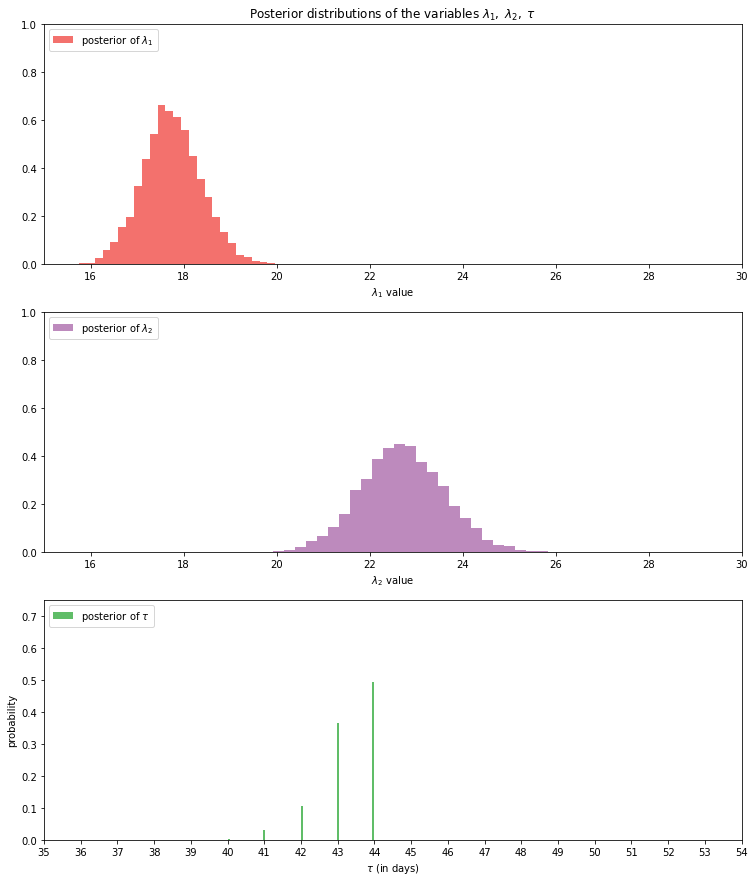

In [63]:
figsize(12.5, 15)

ax = plt.subplot(311)
ax.set_autoscaley_on(False)
plt.hist(lambda_1_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label=r"posterior of $\lambda_1$", color=TFColor[0], density=True)
plt.legend(loc="upper left")
plt.title(r"""Posterior distributions of the variables $\lambda_1,\;\lambda_2,\;\tau$""")
plt.xlim([15, 30])
plt.xlabel(r"$\lambda_1$ value")

ax = plt.subplot(312)
ax.set_autoscaley_on(False)
plt.hist(lambda_2_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label=r"posterior of $\lambda_2$", color=TFColor[6], density=True)
plt.legend(loc="upper left")
plt.xlim([15, 30])
plt.xlabel(r"$\lambda_2$ value")

plt.subplot(313)
w = 1.0 / tau_samples.shape[0] * np.ones_like(tau_samples)
plt.hist(tau_samples, bins=n_count_data[0], alpha=1,
         label=r"posterior of $\tau$",
         color=TFColor[2], weights=w, rwidth=2.)
plt.xticks(np.arange(n_count_data[0]))

plt.legend(loc="upper left")
plt.ylim([0, .75])
plt.xlim([35, len(count_data)-20])
plt.xlabel(r"$\tau$ (in days)")
plt.ylabel(r"probability")
plt.show()